# **Predictive Analytics for Supply Chain Optimization Using Machine Learning Models**

**Import Libraries**

In [51]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

**Load The dataset**

In [52]:
df = pd.read_csv("/content/supply_chain_data.csv")

**Read the dataset**

In [53]:
df.head()

Location_type Inventory_size Product type   SKU      Price  Availability  \
0         Urban          Small     haircare  SKU0  69.808006            55   
1         Rural          Large     skincare  SKU1  14.843523            95   
2         Rural            Mid     haircare  SKU2  11.319683            34   
3         Rural            Mid     skincare  SKU3  61.163343            68   
4         Rural          Large     skincare  SKU4   4.805496            26   

   Number of products sold  Revenue generated Customer demographics  \
0                      802        8661.996792            Non-binary   
1                      736        7460.900065                Female   
2                        8        9577.749626               Unknown   
3                       83        7766.836426            Non-binary   
4                      871        2686.505152            Non-binary   

   Stock levels  ...  Location  Lead time  Production volumes  \
0            58  ...    Mumbai         29                 215   
1            53  ...    Mumbai         23                 517   
2             1  ...    Mumbai         12                 971   
3            23  ...   Kolkata         24                 937   
4             5  ...     Delhi          5                 414   

  Manufacturing lead time  Manufacturing costs Inspection results  \
0                      29            46.279879            Pending   
1                      30            33.616769            Pending   
2                      27            30.688019            Pending   
3                      18            35.624741               Fail   
4                       3            92.065161               Fail   

  Defect rates  Transportation modes   Routes       Costs  
0     0.226410                  Road  Route B  187.752075  
1     4.854068                  Road  Route B  503.065579  
2     4.580593                   Air  Route C  141.920282  
3     4.746649                  Rail  Route A  254.776159  
4     3.145580                   Air  Route A  923.440632  

[5 rows x 26 columns]

**Perform Statistical Analysis**

In [54]:
df.describe()

Price  Availability  Number of products sold  Revenue generated  \
count  101.000000    101.000000               101.000000         101.000000   
mean    49.204912     48.099010               456.920792        5744.189096   
std     31.119787     30.738414               305.011334        2737.928949   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.754605     22.000000               176.000000        2766.342367   
50%     51.123870     43.000000               391.000000        5924.682567   
75%     76.962994     75.000000               704.000000        8232.334829   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    101.000000  101.000000        101.000000      101.000000   
mean      47.623762   15.831683         48.881188        5.732673   
std       31.246712    8.836367         26.866815        2.716215   
min        0.000000    1.000000          1.000000        1.000000   
25%       17.000000    8.000000         26.000000        4.000000   
50%       47.000000   17.000000         52.000000        6.000000   
75%       73.000000   24.000000         71.000000        8.000000   
max      100.000000   30.000000         96.000000       10.000000   

       Shipping costs   Lead time  Production volumes  \
count      101.000000  101.000000          101.000000   
mean         5.506507   16.950495          565.188119   
std          2.671074    8.897613          263.081725   
min          1.013487    1.000000          104.000000   
25%          3.404734   10.000000          334.000000   
50%          5.288190   18.000000          568.000000   
75%          7.577450   25.000000          794.000000   
max          9.929816   30.000000          985.000000   

       Manufacturing lead time  Manufacturing costs  Defect rates       Costs  
count               101.000000           101.000000    101.000000  101.000000  
mean                 14.653465            46.949498      2.257186  525.993448  
std                   8.944759            29.013220      1.467828  259.077043  
min                   1.000000             1.085069      0.018608  103.916248  
25%                   7.000000            22.554107      1.000911  312.574274  
50%                  14.000000            45.531364      2.122472  517.499974  
75%                  23.000000            68.184919      3.541046  762.459182  
max                  30.000000            99.466109      4.939255  997.413450

**Check null values**

In [55]:
df.isnull().sum()

Location_type              0
Inventory_size             0
Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

**Fill missing values with  numerical columns**

In [56]:
numerical_columns = df.select_dtypes(include=['float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

**Fill missing values with  categorical columns**

In [57]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

**Perform Feature Selection**

In [59]:
target_column = 'Customer demographics'

features = df.drop([target_column], axis=1)
target = df[target_column]

**Convert categorical variables to numerical**

In [60]:
features_encoded = pd.get_dummies(features)

**Split the dataset**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)

**Fit LogisticRegression model**

In [62]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [63]:
# Predictions on the testing data
y_pred = model.predict(X_test)

**Classification Report**

In [64]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Female       0.12      0.33      0.18         3
        Male       0.00      0.00      0.00         6
  Non-binary       0.00      0.00      0.00         4
     Unknown       0.14      0.12      0.13         8

    accuracy                           0.10        21
   macro avg       0.07      0.11      0.08        21
weighted avg       0.07      0.10      0.08        21



**Fit Random Forest classification Model**

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score

In [66]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
#  predictions on the testing data
y_pred = model.predict(X_test)

**Classification Report of Random forest model**

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report", class_report)

Accuracy: 0.43
F1-score: 0.35
Precision: 0.50
Classification Report               precision    recall  f1-score   support

      Female       0.25      0.33      0.29         3
        Male       1.00      0.17      0.29         6
  Non-binary       0.00      0.00      0.00         4
     Unknown       0.47      0.88      0.61         8

    accuracy                           0.43        21
   macro avg       0.43      0.34      0.30        21
weighted avg       0.50      0.43      0.35        21



**Fit Decision Tree Model**

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [71]:
# predictions on the test dataset
y_pred = tree_model.predict(X_test)

**Classification Report of Decision tree model**

In [72]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      Female       0.67      0.67      0.67         3
        Male       0.20      0.17      0.18         6
  Non-binary       0.50      0.25      0.33         4
     Unknown       0.45      0.62      0.53         8

    accuracy                           0.43        21
   macro avg       0.46      0.43      0.43        21
weighted avg       0.42      0.43      0.41        21



**Perfrom K-Means Clustering**

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [74]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])

In [75]:
categorical_columns = ['Location_type', 'Inventory_size', 'Product type', 'SKU', 'Shipping carriers', 'Supplier name', 'Location']

In [76]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(numeric_features)

In [77]:
num_clusters = 3

In [78]:
# Fit the KMeans clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Calculate silhouette score**

In [79]:
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.06


# **Data Visulization**

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

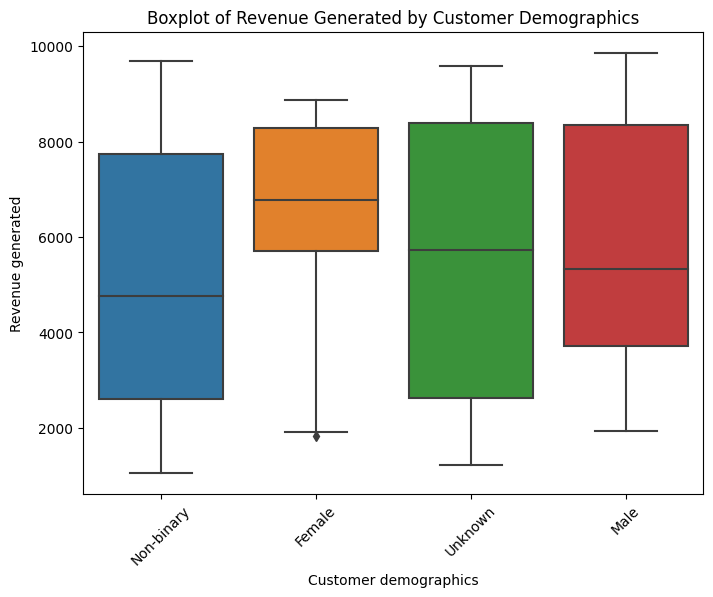

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Customer demographics', y='Revenue generated', data=df)
plt.title("Boxplot of Revenue Generated by Customer Demographics")
plt.xticks(rotation=45)
plt.show()

<ipython-input-82-24ad27cd6cb6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


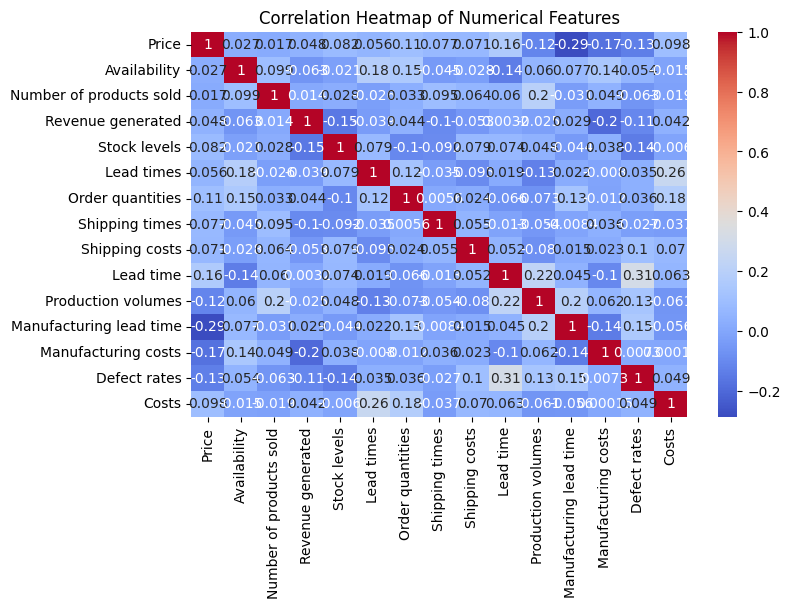

In [82]:
plt.figure(figsize=(8, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

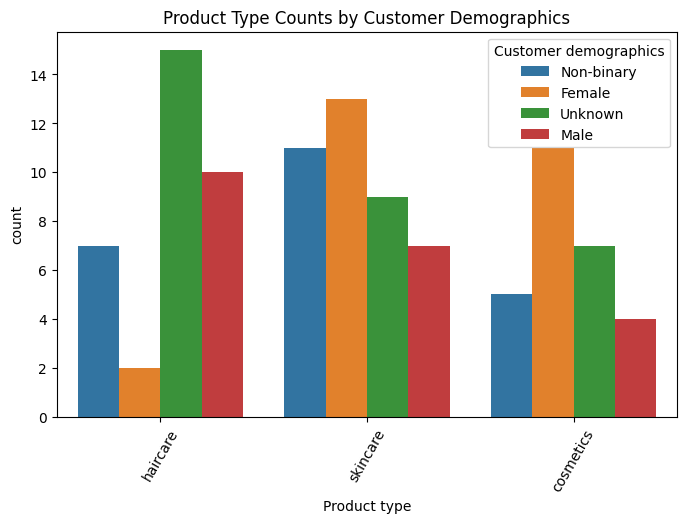

In [83]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Product type', data=df, hue='Customer demographics')
plt.title("Product Type Counts by Customer Demographics")
plt.xticks(rotation=60)
plt.legend(title='Customer demographics')
plt.show()

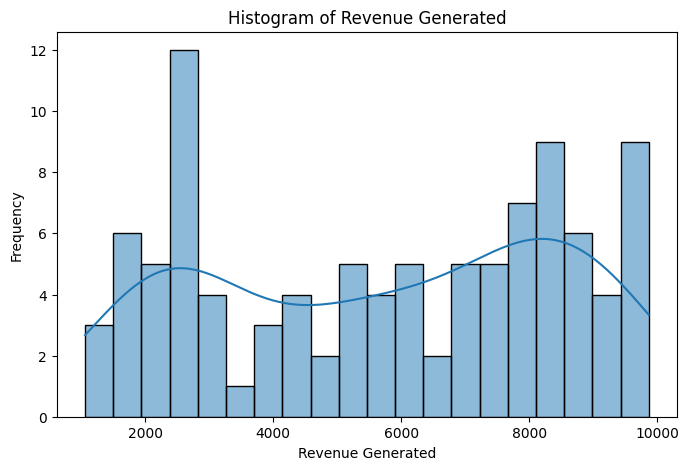

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Revenue generated'], bins=20, kde=True)
plt.title("Histogram of Revenue Generated")
plt.xlabel("Revenue Generated")
plt.ylabel("Frequency")
plt.show()

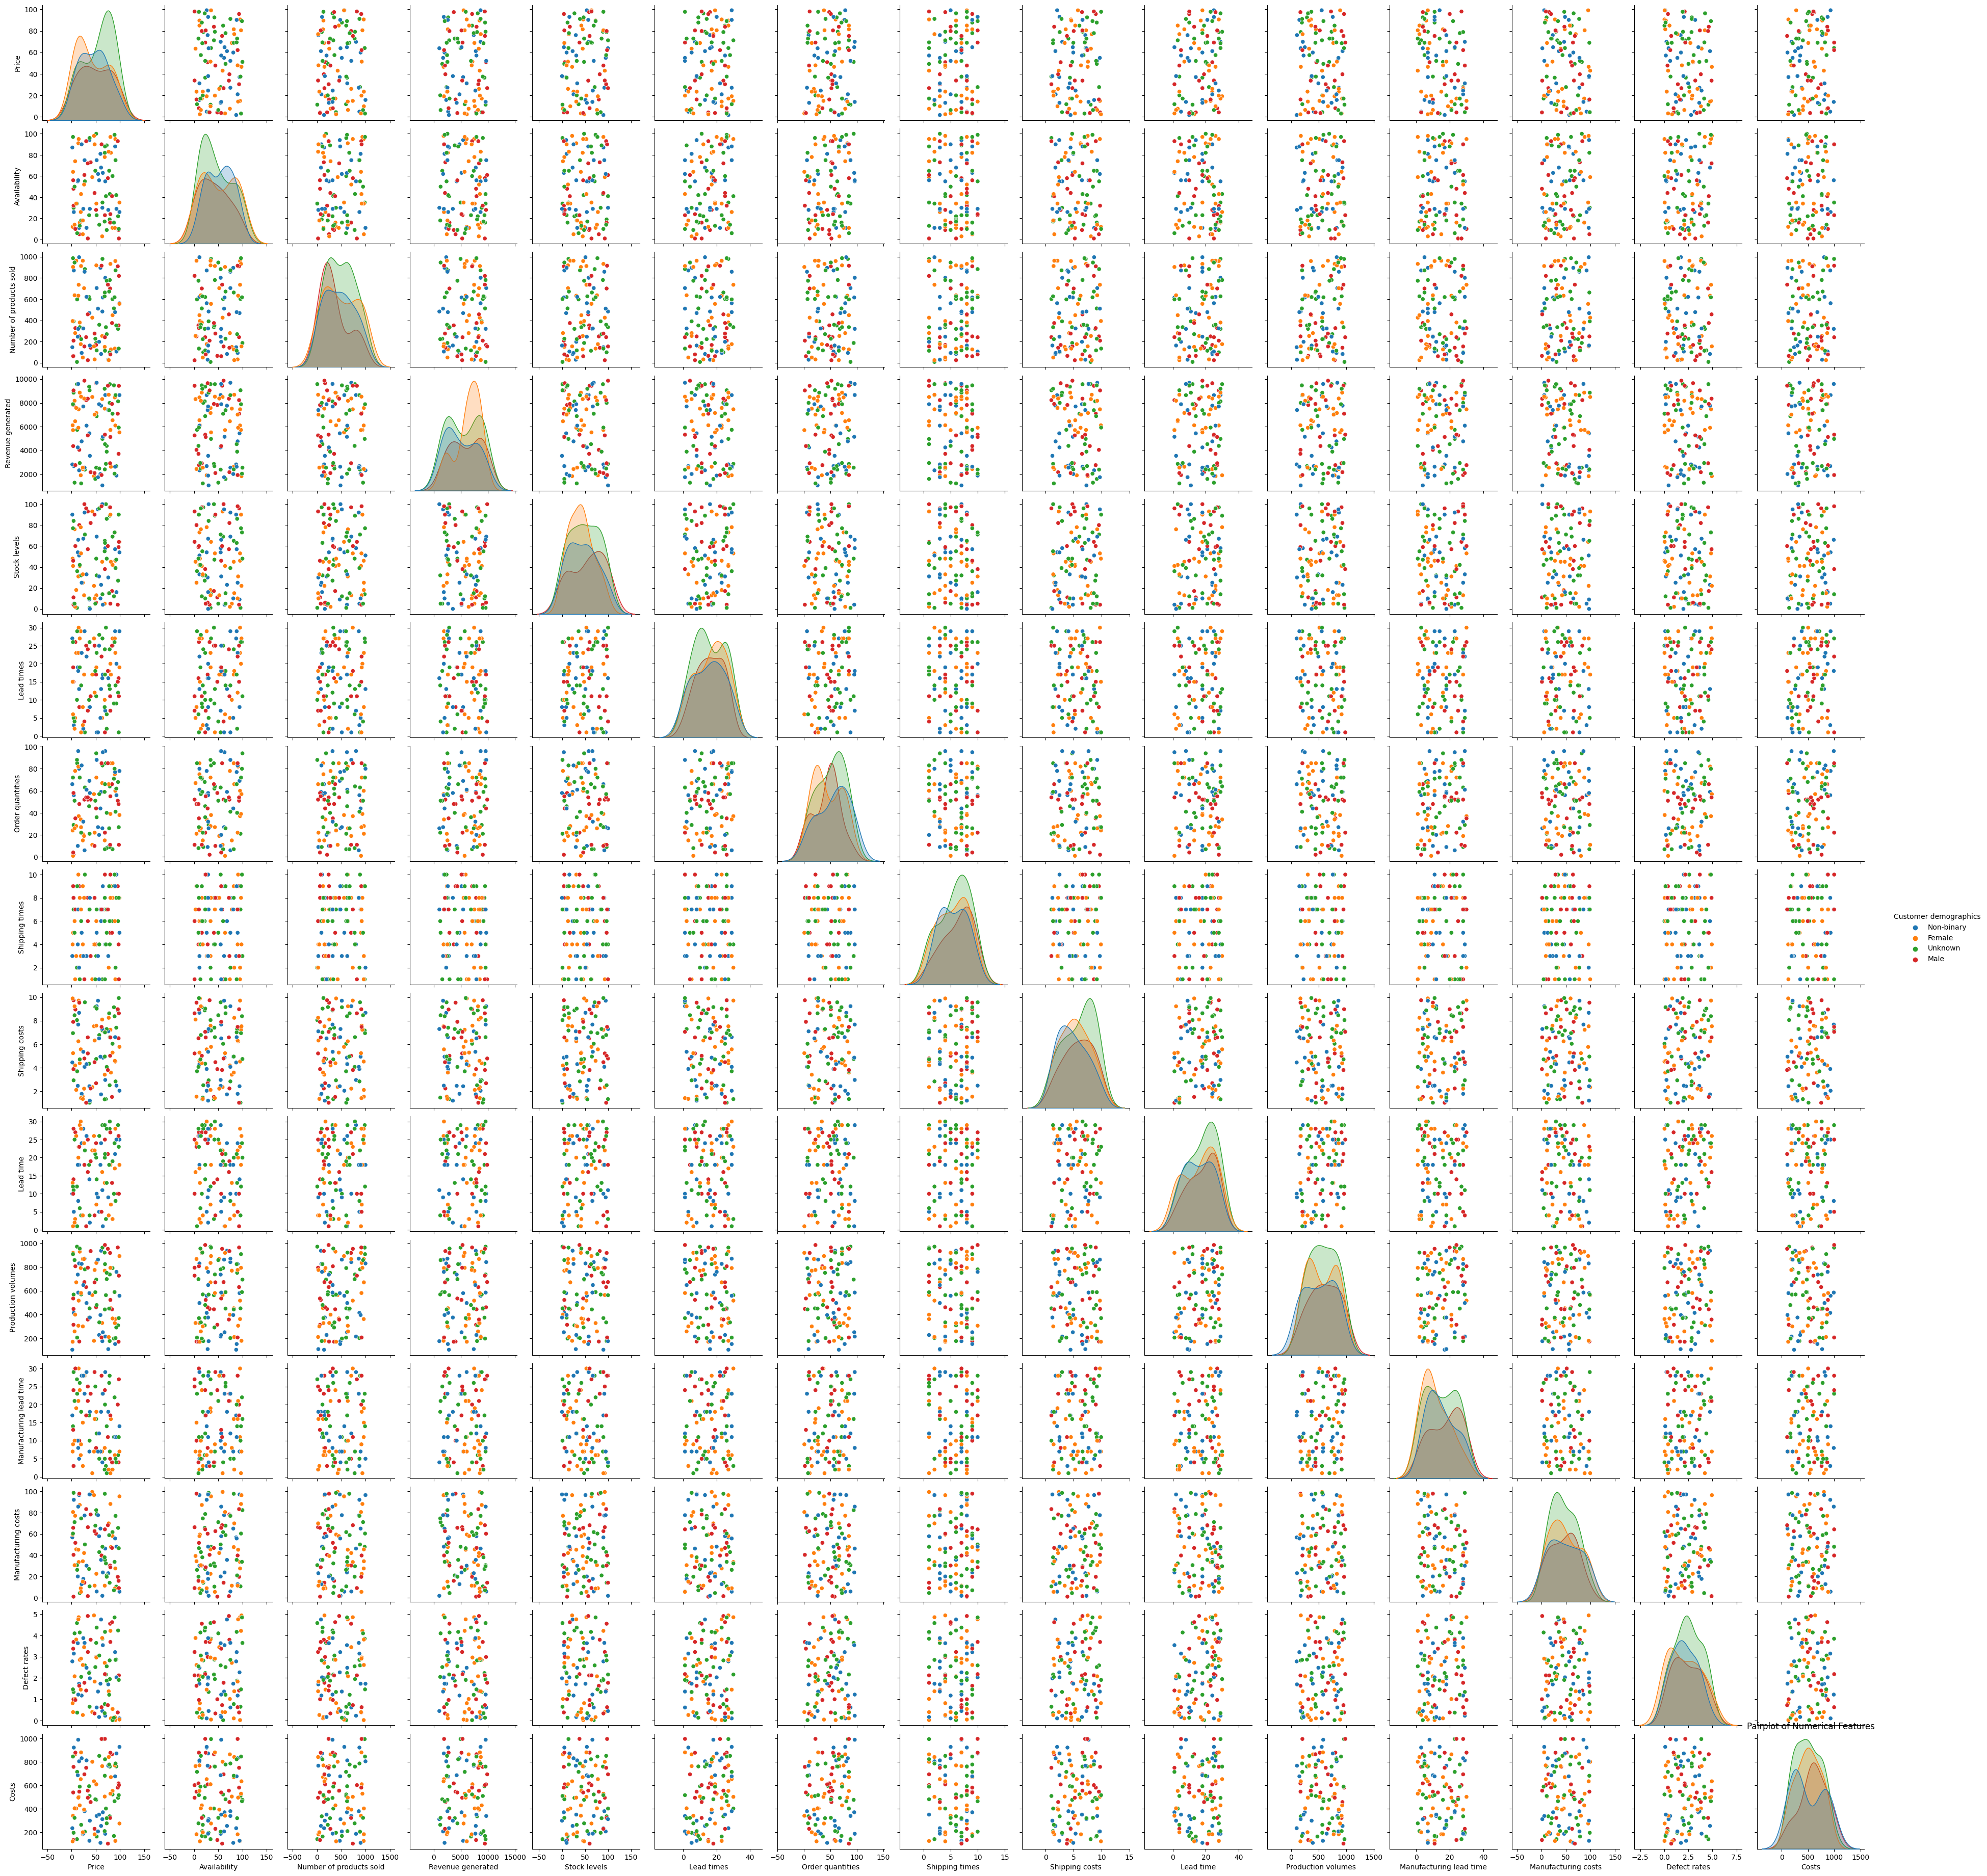

In [85]:
sns.pairplot(df, hue='Customer demographics', diag_kind='kde')
plt.title("Pairplot of Numerical Features")
plt.show()